# Machine Learning in Python using Sklearn

This follows on from the first 2 sessions on basic usage of Python 3 and the Python Pandas package.

## Course Structure
#### Session 1
**Package overview of Scikit-learn**
* introduction
* installing and importing sklearn package
* reading custom toy dataset
* splitting your dataset, train-test vs k-fold, stratified sampling
* preprocessing
* model training
* model validation
* model prediction

#### Session 2
**Using Sklearn to build models at CBA (Case Study)**
* pandas package
    * obtaining data through pycba
    * basic data cleaning
    * data summary
* matplotlib
    * basic visualisation    
* [advanced] plotly

In [72]:
# Greg's supyermodel
# Amueller's github page
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

### Session 0
#### 1. Assumed Knowledge

Previous workshop on Python is assumed knowledge. Specifically:
* Installing and importing packages
* Basic implmentations of CS concepts in Python: variables, lists, functions and loops
* Basic knowledge of Numpy and Pandas packages in Python

### Session 1
#### 1. Introduction
Sklearn stands for Scikit-learning which is an open source machine learning library in Python and was initially developed in 2007 with the purpose to help users build end-to-end machine learning pipelines (excluding model deployment). 

If you'd like to install the sklearn package separately you can run `pip install scikit-learn` in any terminal or `!pip install scikit-learn` in Jupyter Notebook here.

#### 2. Understanding the Data
Sklearn package comes preloaded with small data sets which one can readily test their algorithms. We're going to use the Iris data set

In [77]:
from sklearn.datasets import load_iris
load_iris?

Signature: load_iris(return_X_y=False)
Docstring:
Load and return the iris dataset (classification).

The iris dataset is a classic and very easy multi-class classification
dataset.

=================   ==============
Classes                          3
Samples per class               50
Samples total                  150
Dimensionality                   4
Features            real, positive
=================   ==============

Read more in the :ref:`User Guide <datasets>`.

Parameters
----------
return_X_y : boolean, default=False.
    If True, returns ``(data, target)`` instead of a Bunch object. See
    below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

Returns
-------
data : Bunch
    Dictionary-like object, the interesting attributes are:
    'data', the data to learn, 'target', the classification labels,
    'target_names', the meaning of the labels, 'feature_names', the
    meaning of the features, and 'DESCR', the
    full description of 

In [74]:
data = load_iris()
label = 'species'
X, y = data.data, data.target
print('X first {} rows:\n'.format(10), X[:10, :])
print('y:\n', y)

X first 10 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [56]:
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
df_y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
print(df_y.species.value_counts())
df_y.head()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


##### Pairwise Plots
Pairwise plots show the relationship between each pair of features in the data. It's convenient to use this method to visualize for datasets with small number of fetaures (<=30).

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


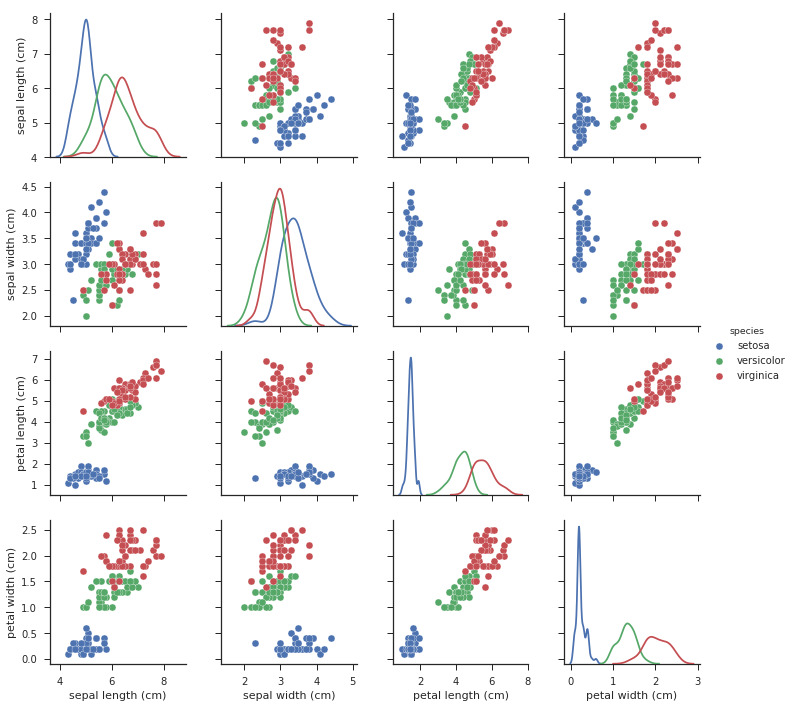

In [75]:
sns.set(style="ticks", color_codes=True)

X_plot = pd.concat([pd.DataFrame(X), pd.DataFrame(iris.target_names[iris.target])], axis=1)
X_plot.columns = iris.feature_names + ['species']
g = sns.pairplot(X_plot, hue="species", diag_kind='kde')

#### 3. Splitting into Different Data Sets

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=123)
print("Labels for training data:", train_y)

Labels for training data: [2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0 2 1 1 0 2 2 0 0
 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1 2 1 1 1 2 0 0
 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2 2]


In [7]:
print(train_y.shape, test_y.shape)

(105,) (45,)


Can also do K-fold, Stratified K-fold, time series splits etc. <br>
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

#### Model Training

In [37]:
classifier = KNeighborsClassifier().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Fraction Correct [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))

print('Samples correctly classified:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('Samples incorrectly classified:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Fraction Correct [Accuracy]:
0.9777777777777777
Samples correctly classified:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
Samples incorrectly classified:
[0]


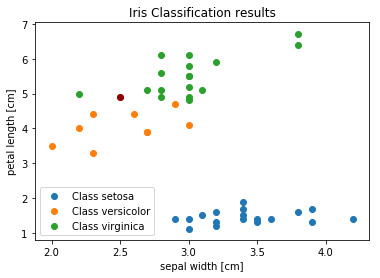

In [38]:
# Plot two dimensions

for n in np.unique(test_y):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], label="Class %s" % str(iris.target_names[n]))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

Fraction Correct [Accuracy]:
0.9777777777777777
Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
Samples incorrectly classified:
[21]


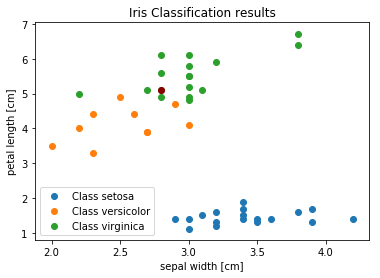

In [41]:
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Fraction Correct [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))

print('Samples correctly classified:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('Samples incorrectly classified:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

# Plot two dimensions

for n in np.unique(test_y):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], label="Class %s" % str(iris.target_names[n]))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

Fraction Correct [Accuracy]:
0.9111111111111111
Samples correctly classified:
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 24 25 26
 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44]
Samples incorrectly classified:
[ 5 21 23 31]


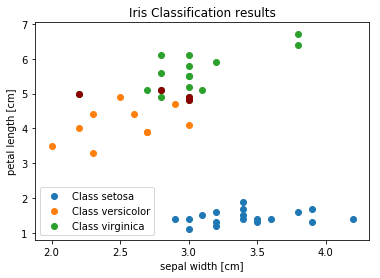

In [42]:
classifier = GradientBoostingClassifier().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Fraction Correct [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))

print('Samples correctly classified:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('Samples incorrectly classified:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

# Plot two dimensions

for n in np.unique(test_y):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], label="Class %s" % str(iris.target_names[n]))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()